### Confirm Tensorflow Installation

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [2]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]='0'
#tf.test.is_built_with_cuda()
#tf.test.is_built_with_gpu_support()
#tf.config.list_physical_devices('GPU')

### Importing the necessary modules

In [3]:
import numpy as np
import os
from os import listdir 
from os.path import isfile, join
import cv2

import tensorflow as tf
import tensorflow.keras as keras


### Loading and Preprocessing

In [4]:
#Data visiting – os.walk()

label_folder = []
total_size = 0
data_path = r"D:\CIFAR10_Test Image\Training_data"

#os.walk() generates the file names(dirpath, dirnames, filenames) 
#in a directory tree by walking the tree either top-down or bottom-up.
for root, dirts, files in os.walk(data_path): 
    for dirt in dirts:
        label_folder.append(dirt)
    total_size += len(files)

    
print("found",total_size,"files.")
print("folder:",label_folder)

found 25000 files.
folder: ['0', '1', '2', '3', '4']


In [5]:
#Load image

base_x_train = []
base_y_train = []

for i in range(len(label_folder)):
    labelPath = data_path+r'\\'+label_folder[i]
    
    #listdir() returns a list containing the names of the entries in the directory given by path.
    #isfile() is used to check whether the specified path is an existing regular file or not.
    FileName = [f for f in listdir(labelPath) if isfile(join(labelPath, f))]
    
    for j in range(len(FileName)):
        path = labelPath+r'\\'+FileName[j]
        
        #use cv2.imread read image.
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        
        base_x_train.append(img)
        base_y_train.append(label_folder[i])


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(25000, 32, 32, 3)
(25000,)


In [6]:
from tensorflow.keras.utils import to_categorical

#Convert a category vector to a binary (0 or 1) matrix-type representation

base_y_train = to_categorical(base_y_train)


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(25000, 32, 32, 3)
(25000, 5)


### Splitting the Data into training and validation data

In [7]:
# Split into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split( \
    np.array(base_x_train), np.array(base_y_train), test_size=0.2, random_state = 0)

print("Training data:", x_train.shape, y_train.shape)
print("Validation data:", x_valid.shape, y_valid.shape)

Training data: (20000, 32, 32, 3) (20000, 5)
Validation data: (5000, 32, 32, 3) (5000, 5)


### Show the image

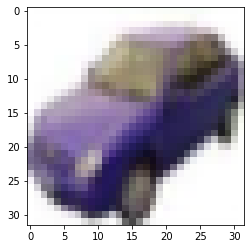

Answer: 1
Answer(one-hot): [0. 1. 0. 0. 0.]


In [8]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0])
plt.imshow(x_train[idx])
plt.show()

print("Answer:", np.argmax(y_train[idx]))
print("Answer(one-hot):", y_train[idx])

### Build the network

### Training the network

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [10]:
epoch = 15
batch_size = 50

model.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/15
400/400 [==============================] - 65s 129ms/step - loss: 1.4973 - accuracy: 0.3711 - val_loss: 1.3535 - val_accuracy: 0.4920
Epoch 2/15
400/400 [==============================] - 52s 130ms/step - loss: 1.2362 - accuracy: 0.5200 - val_loss: 1.1276 - val_accuracy: 0.5734
Epoch 3/15
400/400 [==============================] - 52s 130ms/step - loss: 1.0630 - accuracy: 0.5881 - val_loss: 0.9983 - val_accuracy: 0.6036
Epoch 4/15
400/400 [==============================] - 52s 130ms/step - loss: 0.9399 - accuracy: 0.6392 - val_loss: 0.9069 - val_accuracy: 0.6566
Epoch 5/15
400/400 [==============================] - 52s 131ms/step - loss: 0.8421 - accuracy: 0.6844 - val_loss: 0.8203 - val_accuracy: 0.6890
Epoch 6/15
400/400 [==============================] - 53s 132ms/step - loss: 0.7688 - accuracy: 0.7106 - val_loss: 0.7714 - val_accuracy: 0.7056
Epoch 7/15
400/400 [==============================] - 53s 131ms/step - loss: 0.6908 - accuracy: 0.7419 - val_loss: 0.7399 - val_ac

In [11]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [12]:
epoch = 15
batch_size = 50

model2.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)
history = model2.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/15
400/400 [==============================] - 51s 122ms/step - loss: 1.6198 - accuracy: 0.2017 - val_loss: 1.6265 - val_accuracy: 0.2036
Epoch 2/15
400/400 [==============================] - 49s 122ms/step - loss: 1.6168 - accuracy: 0.2034 - val_loss: 1.6268 - val_accuracy: 0.2040
Epoch 3/15
400/400 [==============================] - 51s 127ms/step - loss: 1.6171 - accuracy: 0.2016 - val_loss: 1.6246 - val_accuracy: 0.2028
Epoch 4/15
400/400 [==============================] - 48s 119ms/step - loss: 1.6148 - accuracy: 0.1991 - val_loss: 1.6238 - val_accuracy: 0.1934
Epoch 5/15
400/400 [==============================] - 48s 121ms/step - loss: 1.6137 - accuracy: 0.1991 - val_loss: 1.6098 - val_accuracy: 0.2040
Epoch 6/15
400/400 [==============================] - 48s 120ms/step - loss: 1.6139 - accuracy: 0.1992 - val_loss: 1.6124 - val_accuracy: 0.2028
Epoch 7/15
400/400 [==============================] - 49s 122ms/step - loss: 1.6125 - accuracy: 0.2035 - val_loss: 1.6096 - val_ac

### Saving the trained weights

In [25]:
model.save("my_model0501.hdf5")

In [26]:
from tensorflow.keras.models import load_model
model2 = load_model("my_model0501.hdf5")

In [27]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [28]:
y_hat = model2.predict(x_valid)

In [29]:
# 將output改為標籤
output_y = np.zeros(y_hat.shape[0])

for i in range(y_hat.shape[0]):
    for j in range(y_hat.shape[1]):
        if y_hat[i, j] >= max(y_hat[i, ]):
            output_y[i] = j

output_y

array([2., 0., 4., ..., 4., 1., 1.])

In [30]:
output_yv = np.zeros(y_valid.shape[0])

for i in range(y_valid.shape[0]):
    for j in range(y_valid.shape[1]):
        if y_valid[i, j] >= max(y_valid[i, ]):
            output_yv[i] = j

output_yv

array([2., 1., 4., ..., 0., 1., 1.])

In [31]:
sum(output_y == output_yv) / len(output_y)

0.8332